In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = "/home/ronald/Documents/Physics_classes/Classes/Labs/Python_macros/Kinematics/data.xlsx"
data = pd.read_excel(data)
print(data)

   t (s)  v (m/s)  error v (m/s)  error t(s)
0   0.00    0.008          0.001       0.001
1   0.01    0.101          0.001       0.001
2   0.02    0.204          0.001       0.001
3   0.03    0.279          0.001       0.001
4   0.04    0.391          0.005       0.001
5   0.05    0.501          0.001       0.001
6   0.06    0.588          0.005       0.001
7   0.07    0.679          0.001       0.001


Slope (a): 9.684523809523816 ± 0.13669410984904382
Intercept (b): 0.004916666666666381 ± 0.0057183248786676424
Residuals: 0    0.003083
1   -0.000762
2    0.005393
3   -0.016452
4   -0.001298
5    0.011857
6    0.002012
7   -0.003833
dtype: float64


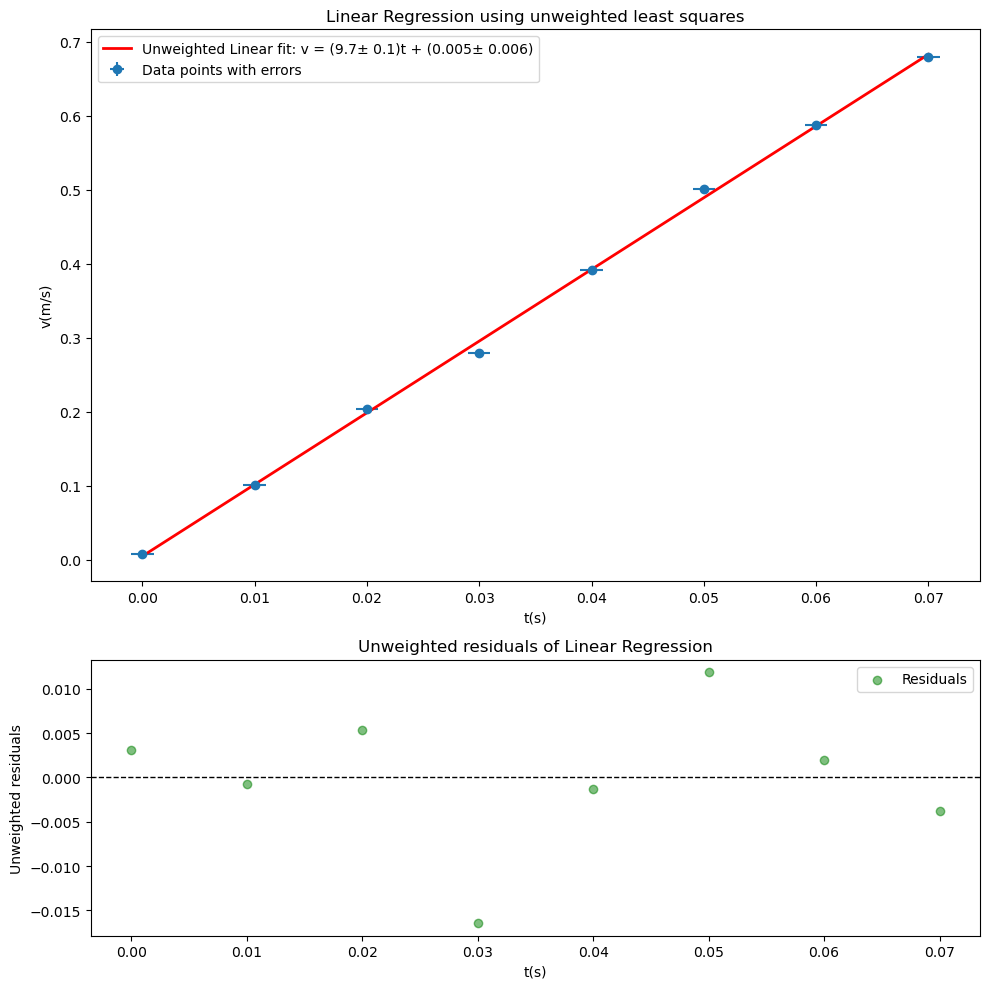

In [6]:
## Setting variables
x = data['t (s)']
y = data['v (m/s)']
yerr = data['error v (m/s)']
xerr = data['error t(s)']

# Calculate the necessary sums
n = len(data)
sum_x = x.sum()
sum_y = y.sum()
sum_xx = (x ** 2).sum()
sum_xy = (x * y).sum()

# Calculate slope (a) and intercept (b)
slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
intercept = (sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x ** 2)

# Calculate residuals and variance of residuals
y_pred = slope * x + intercept
residuals = y - y_pred
s2 = (residuals ** 2).sum() / (n - 2)

# Calculate standard errors
slope_std_err = np.sqrt(n * s2 / (n * sum_xx - sum_x ** 2))
intercept_std_err = np.sqrt(s2 * sum_xx / (n * sum_xx - sum_x ** 2))

print(f"Slope (a): {slope} ± {slope_std_err}")
print(f"Intercept (b): {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Data points with errors')
ax1.plot(x, y_pred, color='red', linewidth=2, label=f'Unweighted Linear fit: v = ({slope:.1f}± {slope_std_err:.1f})t + ({intercept:.3f}± {intercept_std_err:.3f})')

ax1.set_xlabel('t(s)')
ax1.set_ylabel('v(m/s)')
ax1.legend(loc='upper left')
ax1.set_title('Linear Regression using unweighted least squares')

# Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('t(s)')
ax2.set_ylabel('Unweighted residuals')
ax2.legend(loc='upper right')
ax2.set_title('Unweighted residuals of Linear Regression')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Unweighted_linear_regression_with_residuals_least_squares.pdf', format='pdf')
plt.show()

